# HLT Project - Sentiment Analysis

The purpose of our project is to take as input product reviews collected from Amazon (we will discuss the dataset later) and be able to distinguish between positive and negative reviews.

Our idea is to attempt binary classification using only the review titles as input, such as *”Great CD”* or *”Batteries died within a year”*. Clearly, titles are usually short and impactful phrases. Therefore, we believe that these may be sufficient to effectively operate our classifier. However, we plan to extend this idea by also attempting classification using the entire reviews as input. Using the entire reviews entails processing longer sentences and greater computational effort, but it also provides more information and potentially higher accuracy. At this point, our plan is to compare the results of these two classifiers using various metrics to determine which approach is more effective.

**Update**: We are including an additional potential task to implement. We have identified a second dataset that again would allow us to input product reviews from Amazon and classify them as positive or negative reviews. In this case, we could evaluate our algorithms on the two different datasets to assess their effectiveness.


## Import Libraries

As a first step we import all the libraries that we will use in the course of our work.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Utility Functions

As a second step we define some utility functions that we will use during the course of the notebook. Most of these functions will be used to plot different types of graphs, useful especially in the analysis part.

### Bar Chart

In [95]:
# Create a bar chart
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
        
    if xscale is not None:
        plt.xscale(xscale)
    
    if yscale is not None:
        plt.yscale(yscale)

    if show_grid:
        plt.grid(True)

    plt.show()

### Pie Plot

In [127]:
# Create a pie plot
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    plt.figure(figsize=figsize)
    
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()

### WordCloud

In [96]:
# Create WordCloud with text of reviews

def wordcloud_fun(dataset, data_to_plot, figsize=(20,20), max_words=2000,
                  min_font_size=10, height=800, width=1600, background_color="white"):
    
    plt.figure(figsize=figsize)
    wc = WordCloud(max_words=max_words, min_font_size=min_font_size, height=height, width=width, background_color=background_color).generate(" ".join(dataset[data_to_plot]))
    plt.imshow(wc)
    plt.axis('off')  # Remove the axis
    plt.show()

## Load the Datasets

### First Dataset - Amazon Reviews

The **Amazon Reviews** dataset consists of reviews from Amazon. We then load this first dataset, which we save in the **Dataset_1** dataframe.

In [97]:
Dataset_1 = pd.read_csv("Datasets/Dataset_1/train.csv", header=None, names=["polarity", "title", "text"])

The dataset contains 3 different columns: *polarity*, *title*, *text*. Here’s a brief description of these features:

- **polarity**: In this column, a number between 1 and 2 is written. In constructing the dataset, the label 1 was inserted for all negative reviews (those with 1 or 2 stars), while the label 2 was inserted for all positive reviews (4 or 5 stars). Reviews with 3 stars were ignored. 
- **title**: It contains the titles of the reviews.
- **text**: It contains the entire text of each review.

In [98]:
Dataset_1.head()

polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                                text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

Let us print some information about this dataframe.

In [99]:
Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


### Second Dataset - Amazon Books Reviews

Also the **Amazon Books Reviews** dataset consists of reviews from Amazon. We load our dataset into the **Dataset_2** dataframe.

In [100]:
Dataset_2 = pd.read_csv("Datasets/Dataset_2/Books_rating.csv")

We print the first 5 rows of the dataframe to see the information it carries. As we can see many columns will not be interesting for our studies, so we will remove them later. In particular, we will focus only on three columns: review/score, review/summary, review/text. Here’s a brief descrip- tion of these features:
- **review/score:** It contains the score, from 1 to 5 stars, of each review. Specifically, 1 star indicates that the review is strongly negative, while 5 stars indicate that the review is strongly positive. 
- **review/summary:** It contains the titles of the reviews.
- **review/text:** It contains the entire text of each review.

In [101]:
Dataset_2.head()

Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strain images   
1   1095724800                                Really Enjoyed It   
2   1078790400  Essential for every personal and Public Library   
3   1090713600  Phlip Nel gives silly Seuss a serious treatment   
4   1107993600                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

Let again print some information about this dataframe.

In [102]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


## Study and Cleaning Dataset

At this point move on to cleaning and study our datasets.

### First Dataset - Amazon Reviews

As a first step we see if there are duplicate rows. In this we do not find duplicates to delete.

In [103]:
Duplicated_raws=Dataset_1.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())
#Dataset_1=Dataset_1.drop_duplicates()

The total number of duplicate rows are 0


Let us now check whether there are some null elements in some columns. In fact, there are 207 null elements in the *title* column. Since we have to use this column during our analysis, we cannot have null elements. We are therefore going to delete the rows with null elements.

In [104]:
Dataset_1.isna().sum()

polarity      0
title       207
text          0
dtype: int64

In [105]:
Dataset_1=Dataset_1.dropna()

In [106]:
Dataset_1.shape

(3599793, 3)

Let us look at the distribution of values in the *polarity* column. As we see these values are practically balanced.

In [107]:
Dataset_1.polarity.value_counts()

polarity
2    1799913
1    1799880
Name: count, dtype: int64

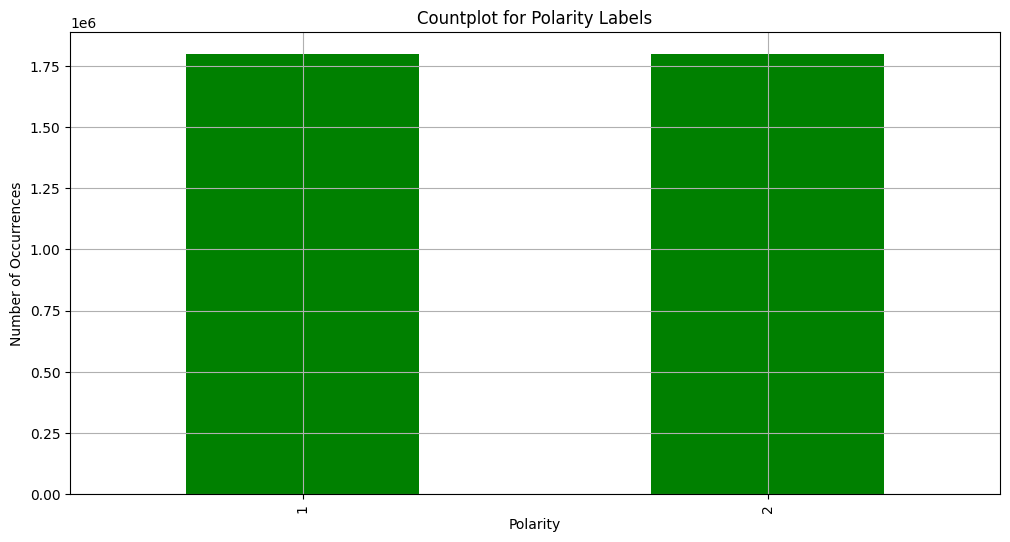

In [108]:
data_by_polarity = Dataset_1.groupby('polarity').size()

barchart_func(data_to_plot=data_by_polarity,
              ticksrange=range(len(data_by_polarity)),
              ticksname=data_by_polarity.index,
              title='Countplot for Polarity Labels',
              xlabel="Polarity",
              ylabel="Number of Occurrences",
              color="green",
              rotation=90,
              #yscale=None,
              show_grid=True
              )

#### WordClouds on Reviews

Now we use WordClouds, that is useful for viewing and analyzing words that are frequently used. We first do that analysis on data with polarity equal to 1, so with bad reviews, and then to data with polarity equal to 2.

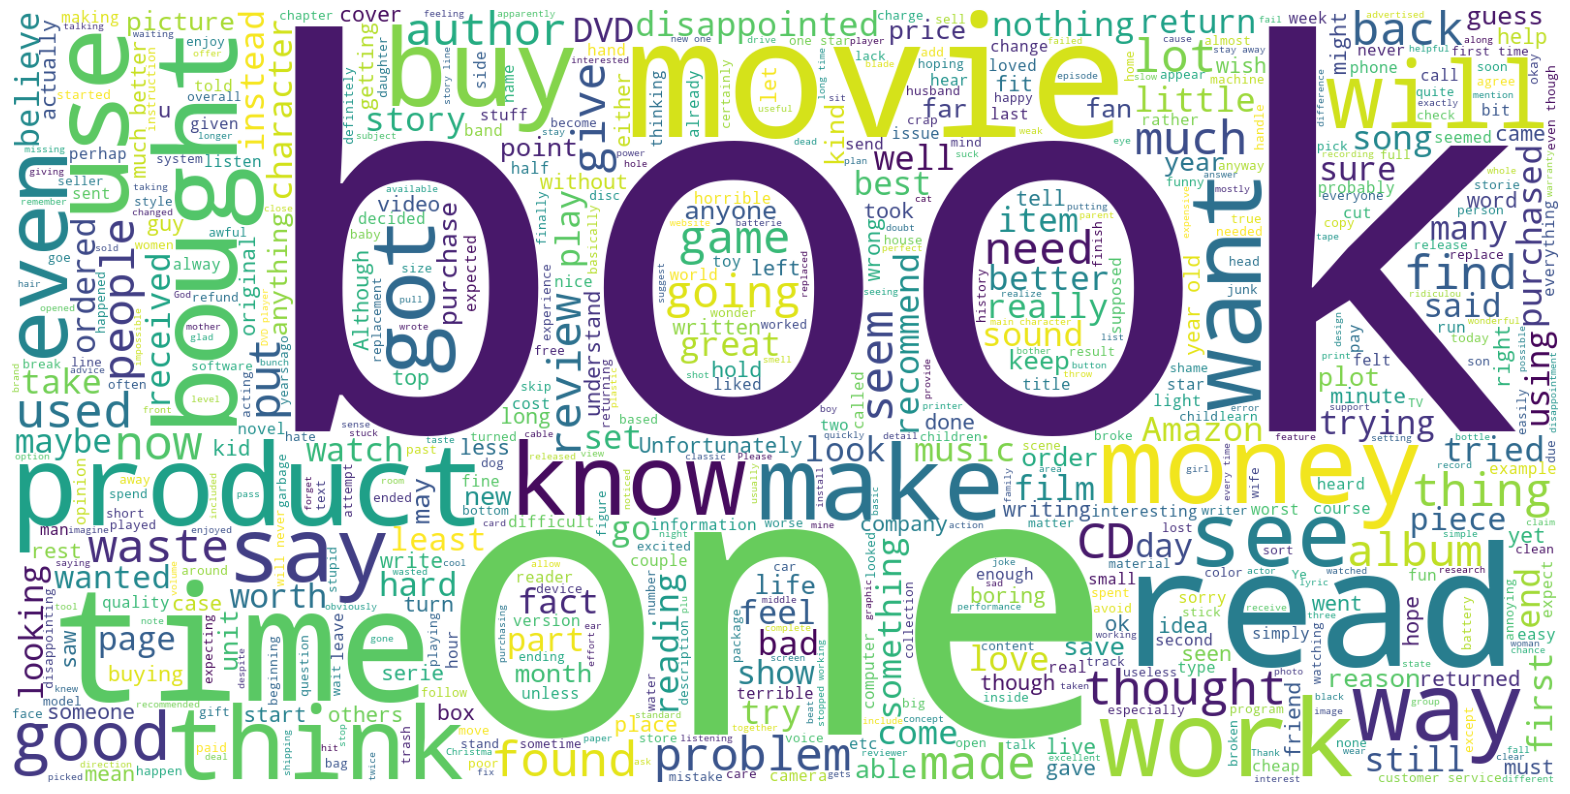

In [109]:
# Dataframe with polarity = 1
filtered_df = Dataset_1[Dataset_1['polarity'] == 1]

wordcloud_fun(filtered_df, "text")

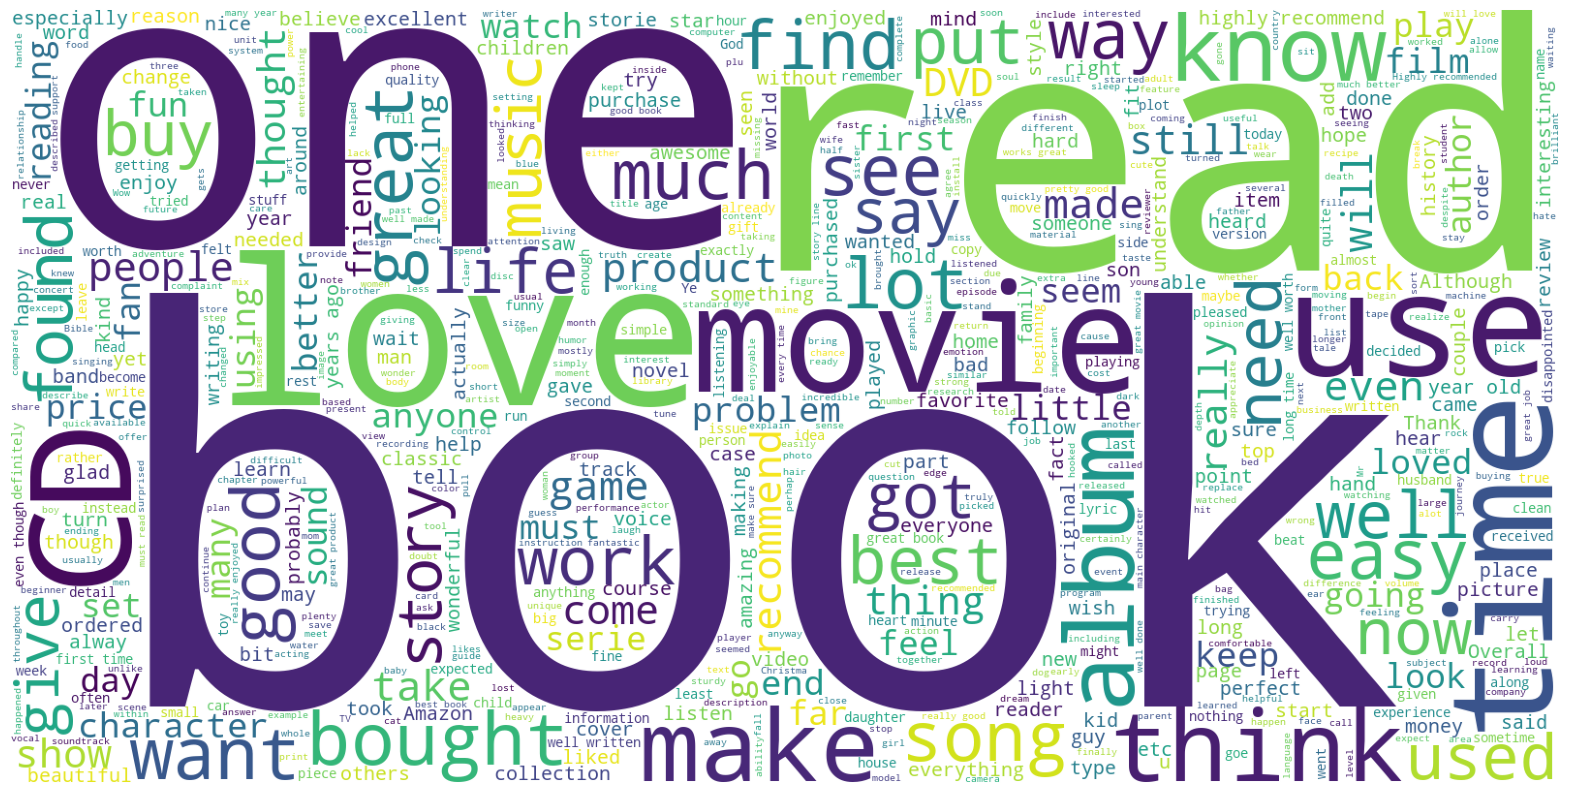

In [110]:
# Dataframe with polarity = 2
filtered_df = Dataset_1[Dataset_1['polarity'] == 2]

wordcloud_fun(filtered_df, "text")

##### WordClouds on Titles

Again, first we use WordClouds only to data with polarity equal to 1, and then for data with polarity equal to 2.

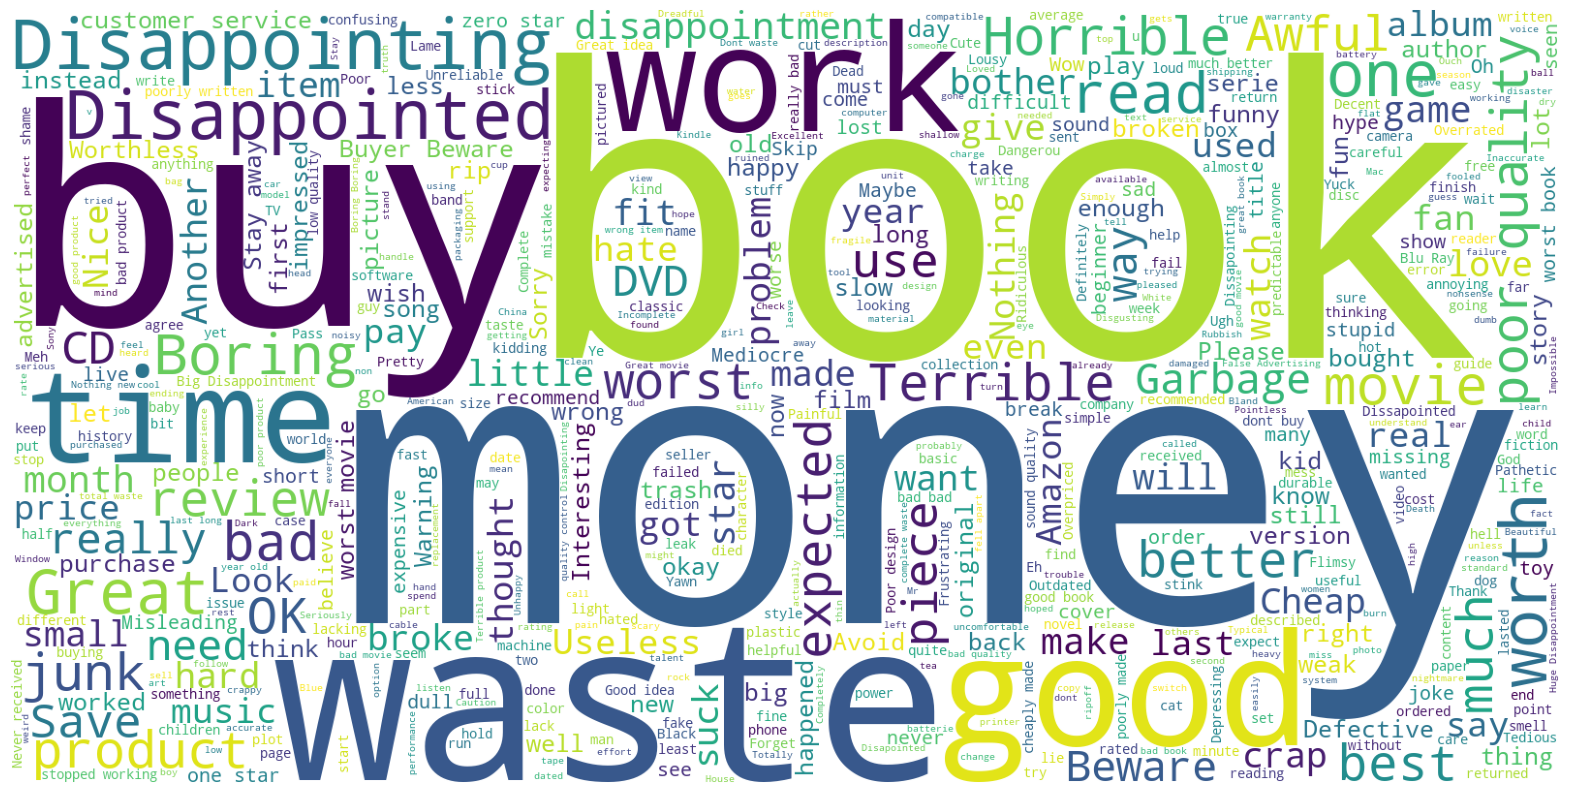

In [111]:
# Dataframe with polarity = 1
filtered_df = Dataset_1[Dataset_1['polarity'] == 1]

wordcloud_fun(filtered_df, "title")

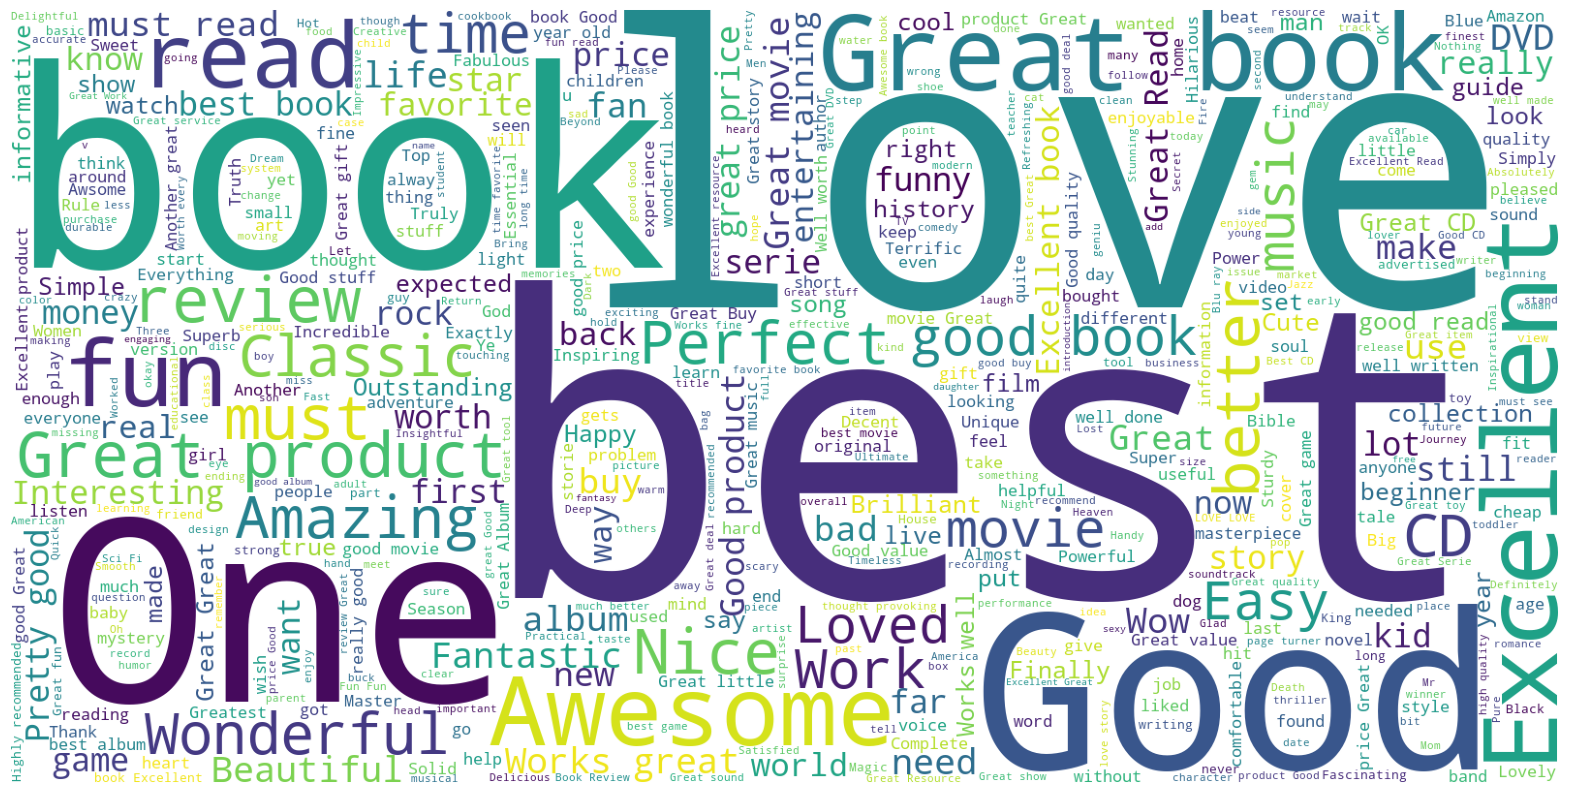

In [112]:
# Dataframe with polarity = 2
filtered_df = Dataset_1[Dataset_1['polarity'] == 2]

wordcloud_fun(filtered_df, "title")

### Second Dataset - Amazon Books Reviews

As a first step, we remove all columns that we do not need for our analysis.

In [113]:
Dataset_2=Dataset_2.drop(columns="User_id")
Dataset_2=Dataset_2.drop(columns="profileName")
Dataset_2=Dataset_2.drop(columns="review/time")
Dataset_2=Dataset_2.drop(columns="Id")
Dataset_2=Dataset_2.drop(columns="Price")
Dataset_2=Dataset_2.drop(columns="review/helpfulness")
Dataset_2=Dataset_2.drop(columns="Title")

We reprint the first 5 rows of the dataframe to see how they are modified.

In [114]:
Dataset_2.head()

review/score                                   review/summary  \
0           4.0           Nice collection of Julie Strain images   
1           5.0                                Really Enjoyed It   
2           5.0  Essential for every personal and Public Library   
3           4.0  Phlip Nel gives silly Seuss a serious treatment   
4           4.0                           Good academic overview   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
1  I don't care much for Dr. Seuss but after read...  
2  If people become the books they read and if "t...  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4  Philip Nel - Dr. Seuss: American IconThis is b...

We now move on to delete all duplicate rows, of which there are many in this dataset.

In [115]:
Duplicated_raws=Dataset_2.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())

Dataset_2=Dataset_2.drop_duplicates()

The total number of duplicate rows are 931690


We now move on to delete rows with null values.

In [116]:
Dataset_2.isna().sum()


review/score        0
review/summary    188
review/text         2
dtype: int64

In [117]:
Dataset_2=Dataset_2.dropna()

Again, let us look at the distribution of values in the *review/score* column.

In [118]:
Dataset_2["review/score"].value_counts()

review/score
5.0    1233811
4.0     401379
3.0     177173
1.0     146689
2.0     109068
Name: count, dtype: int64

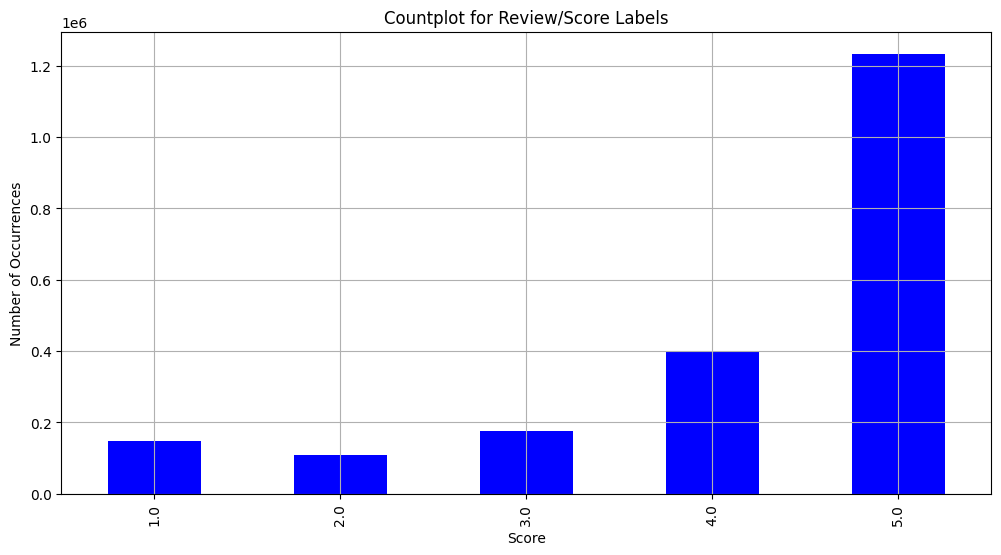

In [119]:
data_by_class = Dataset_2.groupby('review/score').size()

barchart_func(data_to_plot=data_by_class,
              ticksrange=range(len(data_by_class)),
              ticksname=data_by_class.index,
              title='Countplot for Review/Score Labels',
              xlabel="Score",
              ylabel="Number of Occurrences",
              color="blue",
              rotation=90,
              #yscale=None,
              show_grid=True
              )

At this point, however, we want to align the data in the *review/score* column with the data in the *polarity* column of the first dataset.

In [120]:
Dataset_2 = Dataset_2[Dataset_2['review/score'] != 3]

Now we create a new polarity column in the same way is constructed for the Dataset_1, so such that:
- *polarity*=1 if *review/score*=1 or 2;
- *polarity*=2 if *review/score*=4 or 5.

In [121]:
# We define a function that returns the polarity value based on the review scoreone
def get_polarity(score):
    if score in [1, 2]:
        return 1
    elif score in [4, 5]:
        return 2

Dataset_2['polarity'] = Dataset_2['review/score'].apply(get_polarity)

Dataset_2.head()


review/score                                   review/summary  \
0           4.0           Nice collection of Julie Strain images   
1           5.0                                Really Enjoyed It   
2           5.0  Essential for every personal and Public Library   
3           4.0  Phlip Nel gives silly Seuss a serious treatment   
4           4.0                           Good academic overview   

                                         review/text  polarity  
0  This is only for Julie Strain fans. It's a col...         2  
1  I don't care much for Dr. Seuss but after read...         2  
2  If people become the books they read and if "t...         2  
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...         2  
4  Philip Nel - Dr. Seuss: American IconThis is b...         2

We now see that in this case the values in the *polarity* column are not balanced, as in the first dataset.

In [122]:
Dataset_2.polarity.value_counts()

polarity
2    1635190
1     255757
Name: count, dtype: int64

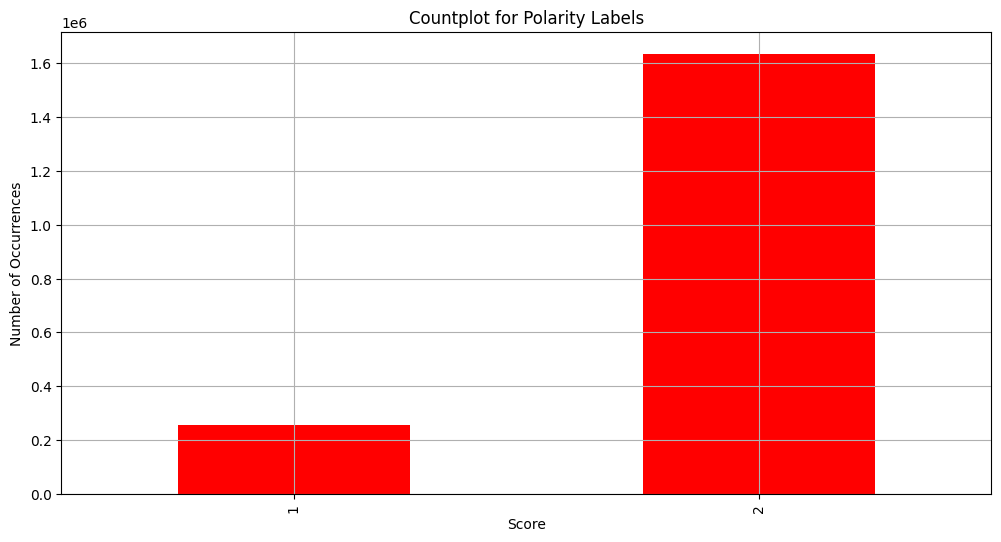

In [123]:
data_by_class = Dataset_2.groupby('polarity').size()

barchart_func(data_to_plot=data_by_class,
              ticksrange=range(len(data_by_class)),
              ticksname=data_by_class.index,
              title='Countplot for Polarity Labels',
              xlabel="Score",
              ylabel="Number of Occurrences",
              color="red",
              rotation=90,
              #yscale=None,
              show_grid=True
              )

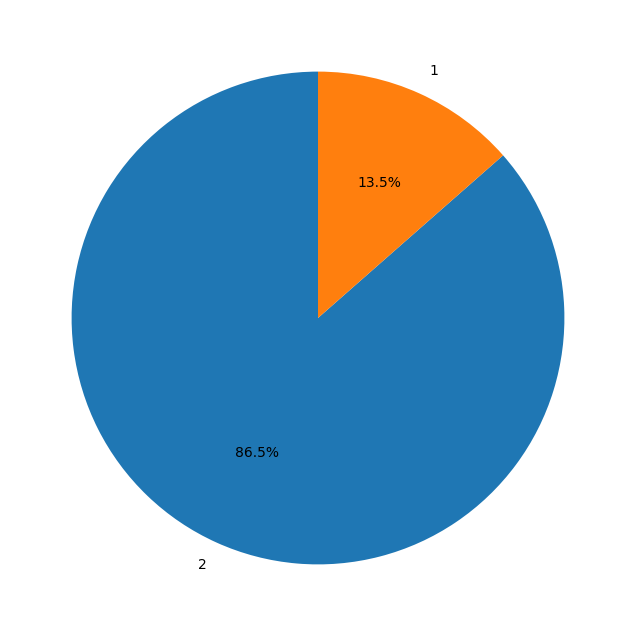

In [129]:
data_to_plot=Dataset_2.polarity.value_counts()

pieplot_func(data_to_plot.values, labels=data_to_plot.index)

Finally, we delete the *review/score* column as we no longer need it.

In [124]:
Dataset_2=Dataset_2.drop(columns="review/score")

##### WordClouds on Titles

Now we do the same we did with the first dataset.

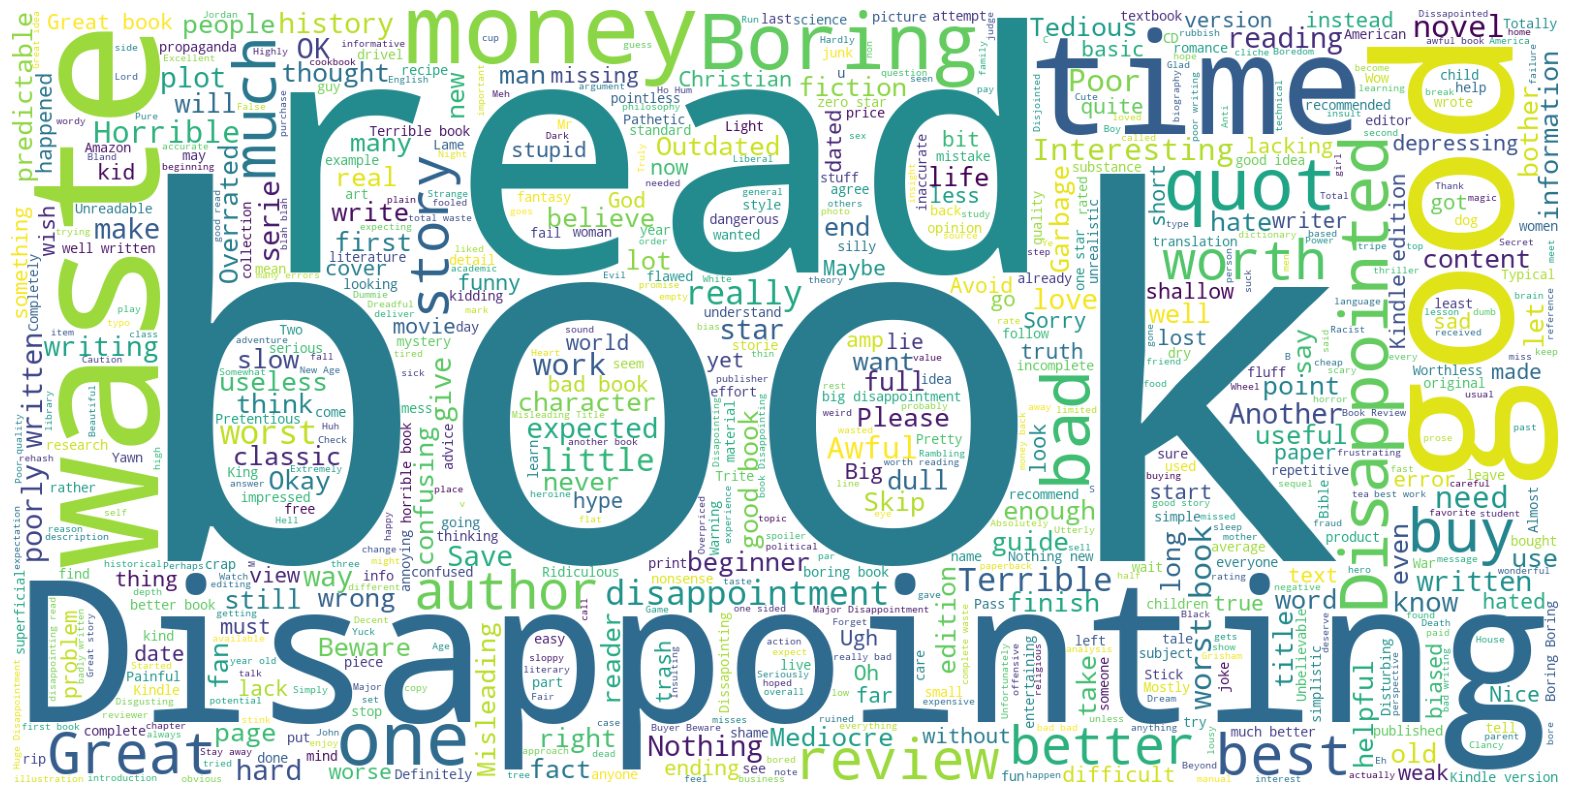

In [125]:
# Dataframe with polarity = 1
filtered_df = Dataset_2[Dataset_2['polarity'] == 1]

wordcloud_fun(filtered_df, "review/summary")

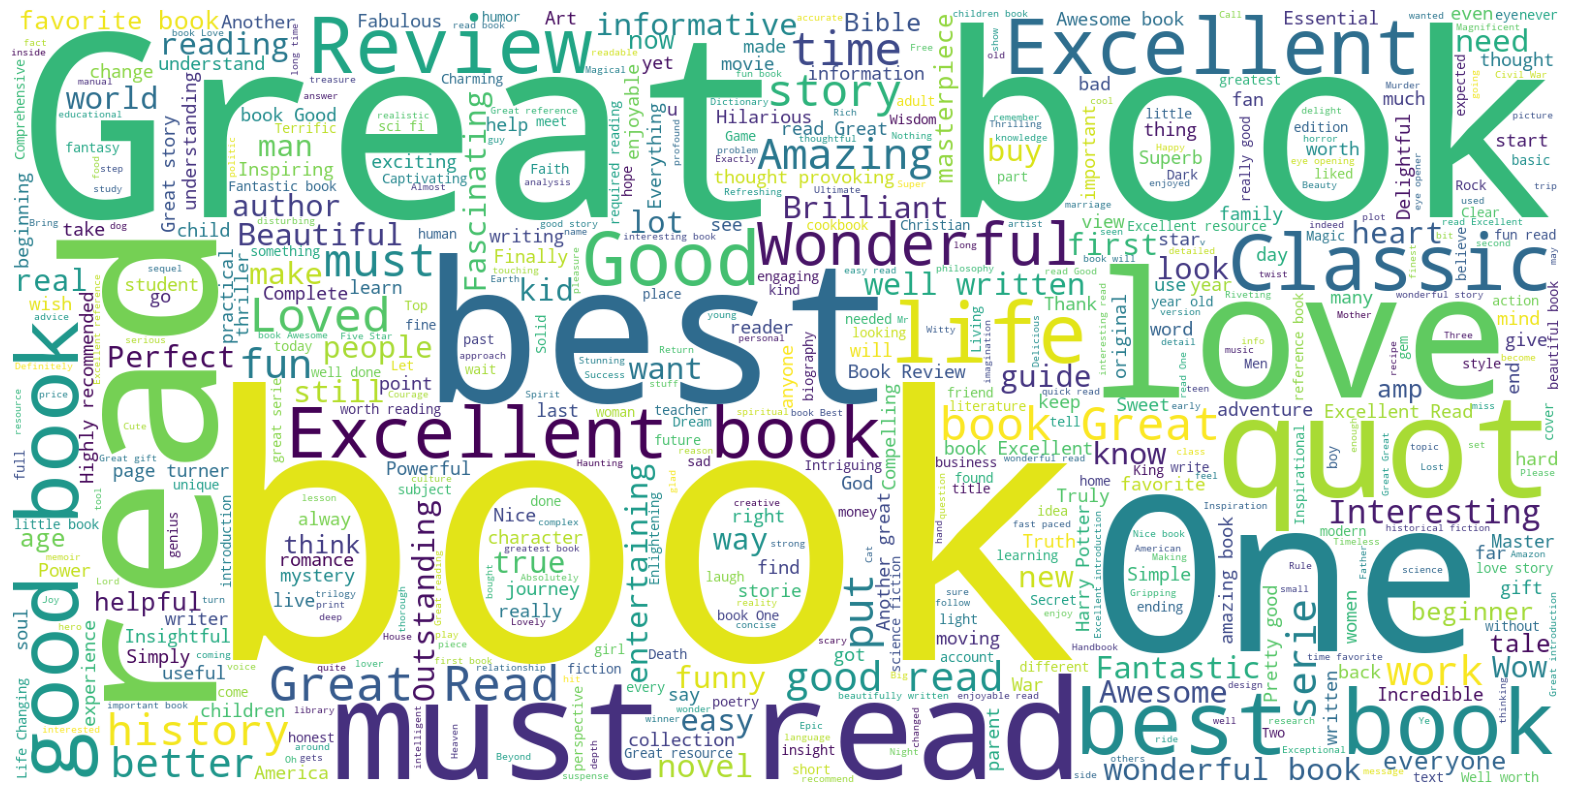

In [126]:
# Dataframe with polarity = 2
filtered_df = Dataset_2[Dataset_2['polarity'] == 2]

wordcloud_fun(filtered_df, "review/summary")